# Heart Disease Prediction
In this machine learning project, we will predict whether a person is suffering from heart disease or not.

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings("ignore")

### Loading the data set

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis (EDA)

In [3]:
# Lets see some informations about the dataset for better understanding of the problem statement

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Lets see the description of the dataset -- Five number summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


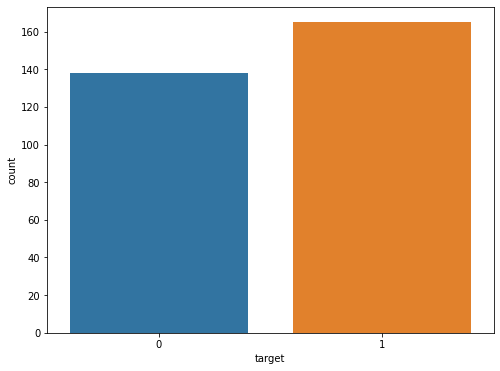

In [5]:
# Countplot

f, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x = "target", data = df)
plt.show();

From this countplot, we can infer that the dataset is balanced.

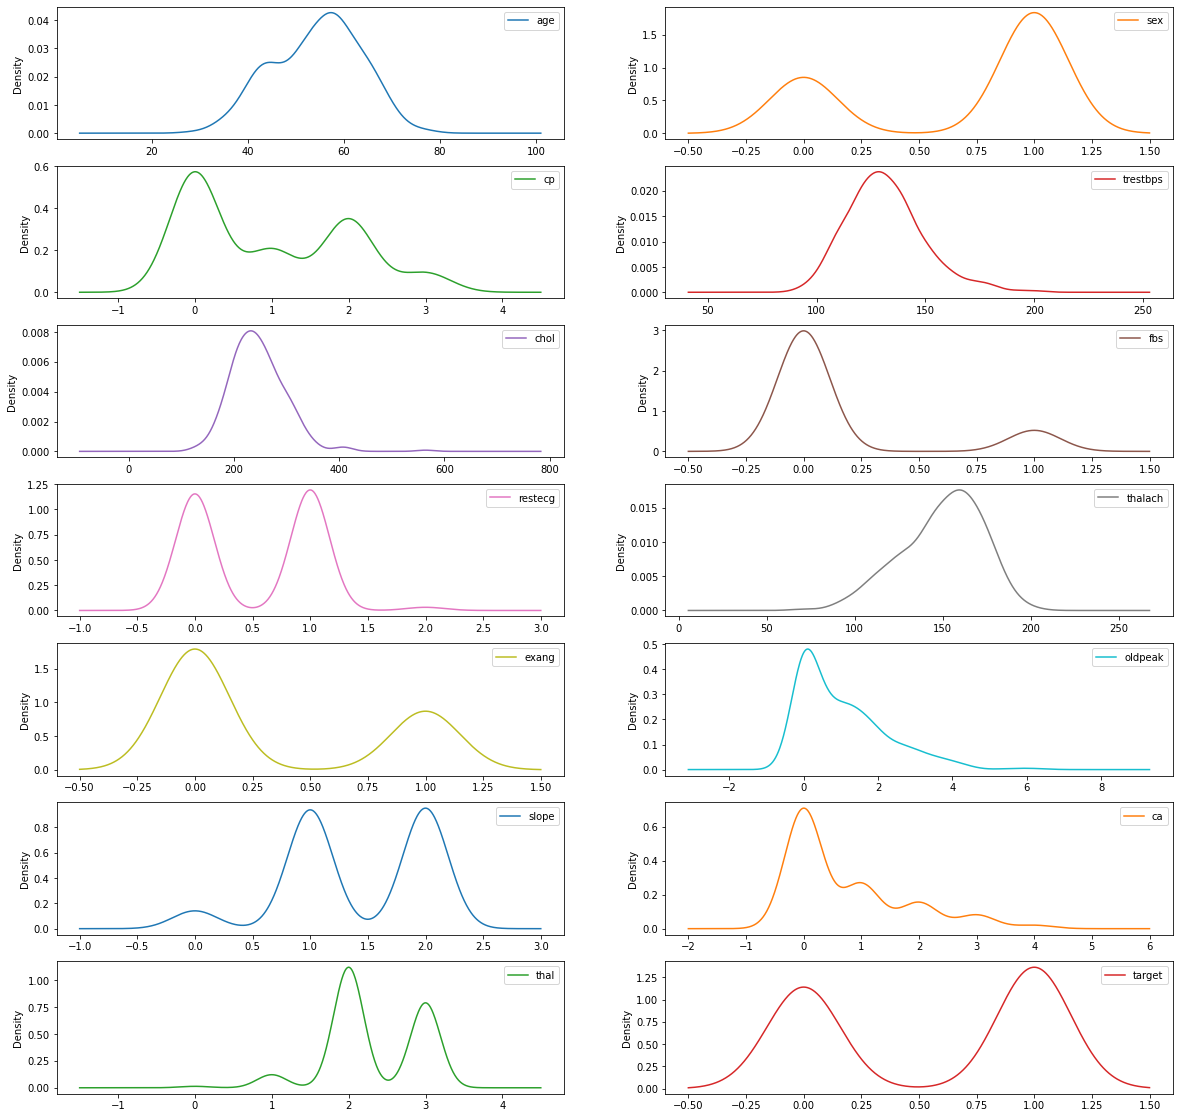

In [6]:
# Lets see the distribution of each feature using density plot

df.plot(kind = "density", subplots = True, layout = (7,2), sharex = False, figsize = (20,20));

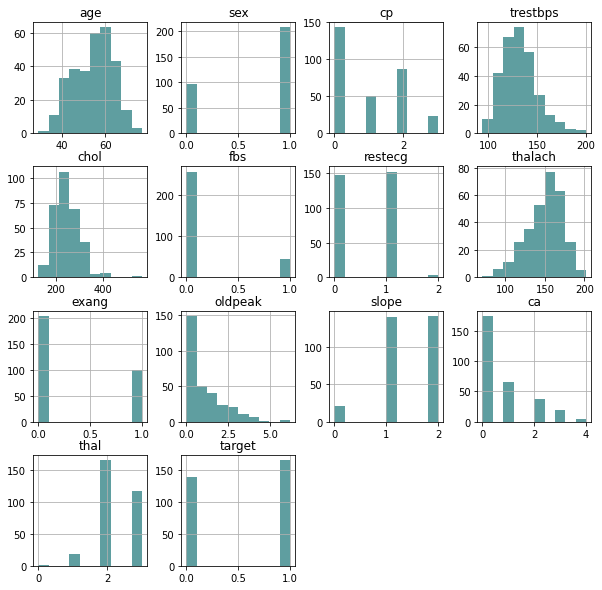

In [7]:
# Lets see the histograms

df.hist(figsize = (10,10), color = "#5F9EA0");

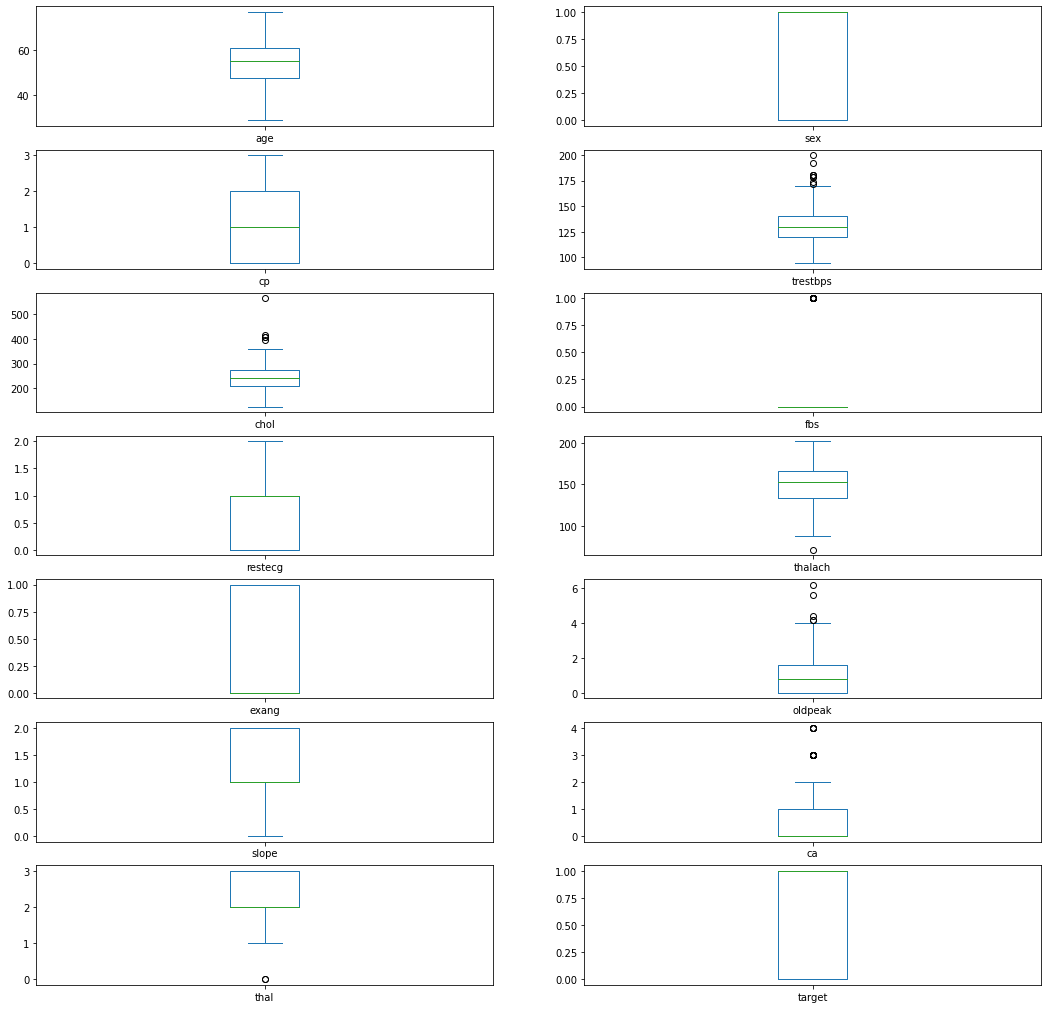

In [8]:
# Lets see the boxpots to verify if there is any outliers 

df.plot(kind = "box", subplots = True, layout = (7,2), sharex = False, sharey = False, figsize = (18,18));

We can see some amount of outliers present in few features. 

In [9]:
# Lets see the correlation target feature wrt to other features

correlation = df.corr()

correlation["target"].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

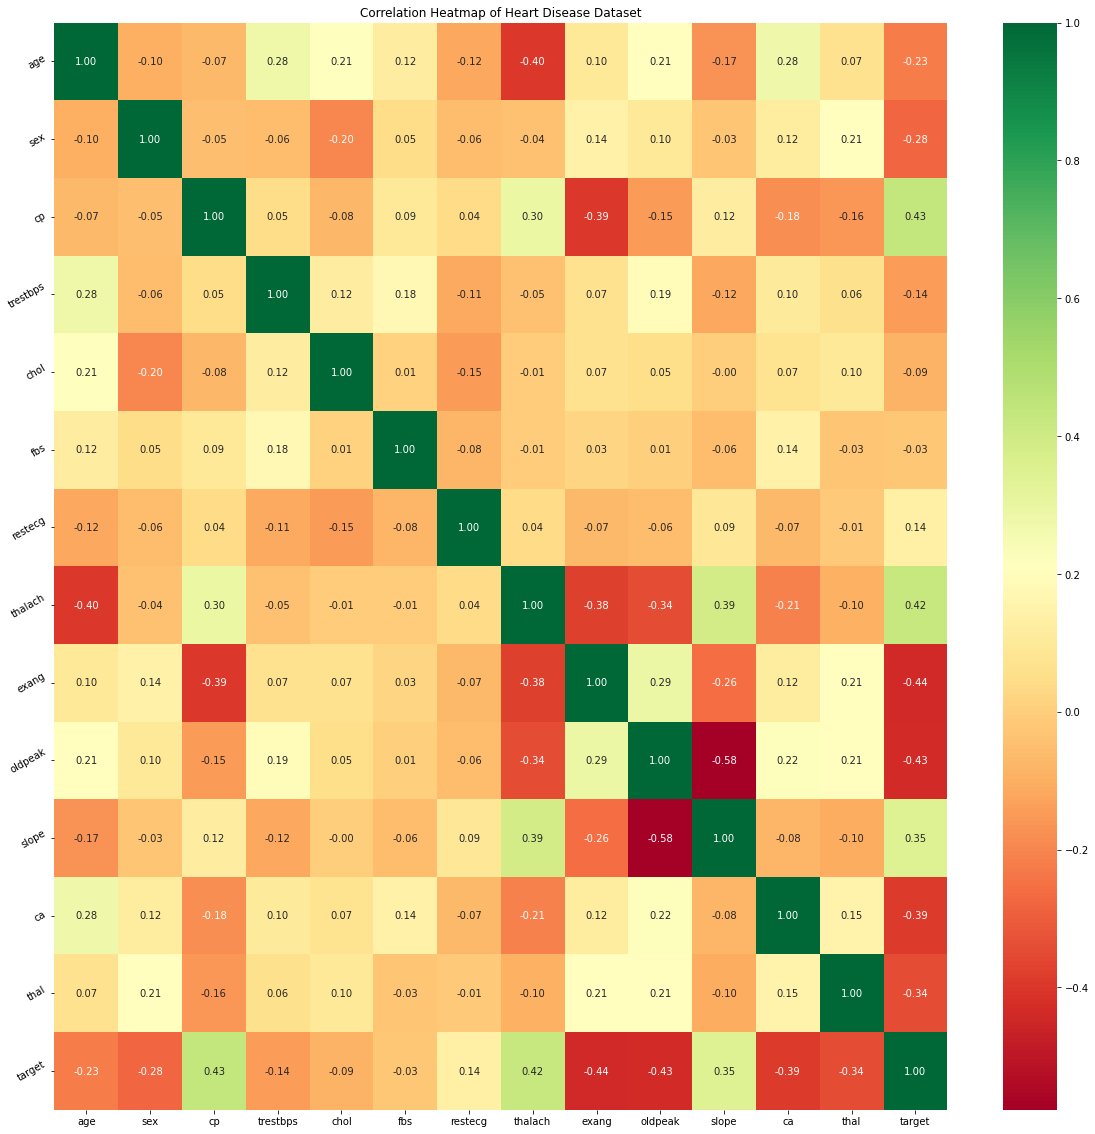

In [10]:
# Correlation Heatmap

top_corr_features = correlation.index
plt.figure(figsize = (20,20))
plt.title("Correlation Heatmap of Heart Disease Dataset")
g = sns.heatmap(df[top_corr_features].corr(), annot = True, fmt = ".2f", cmap = "RdYlGn")
g.set_yticklabels(g.get_yticklabels(), rotation = 30)
plt.show();

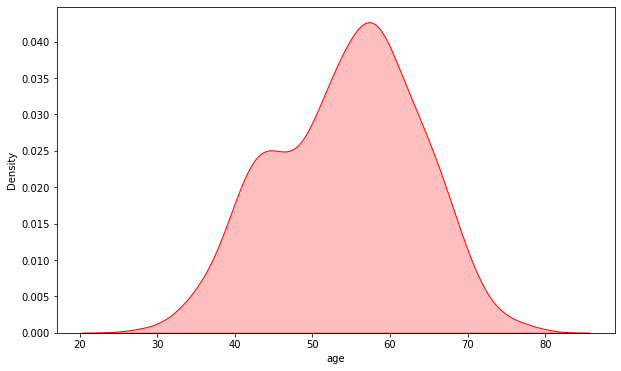

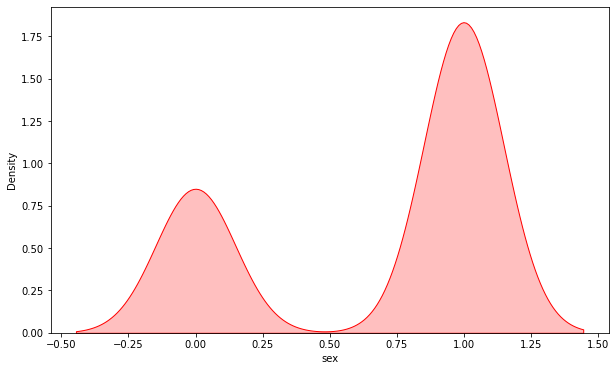

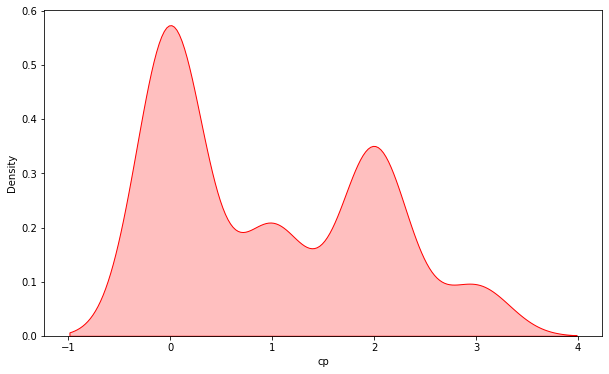

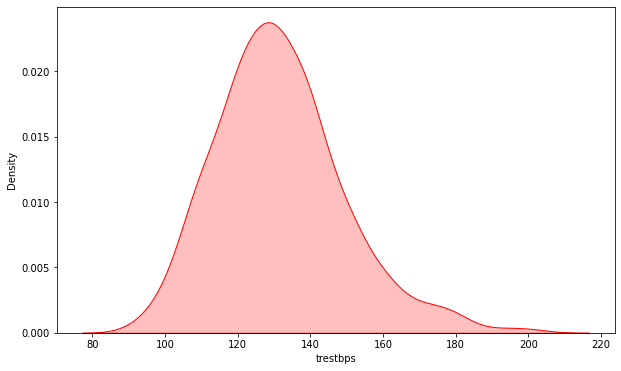

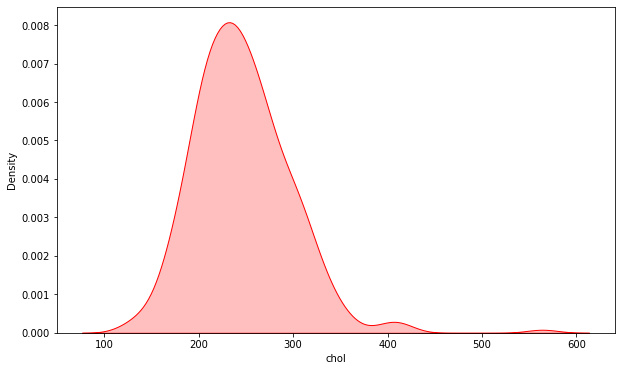

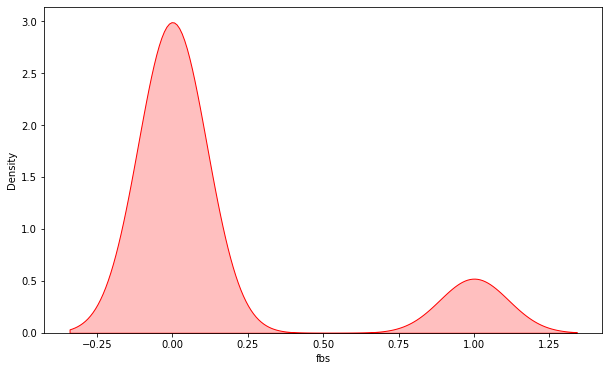

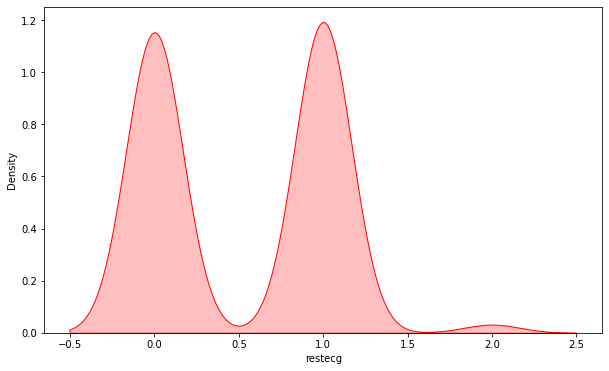

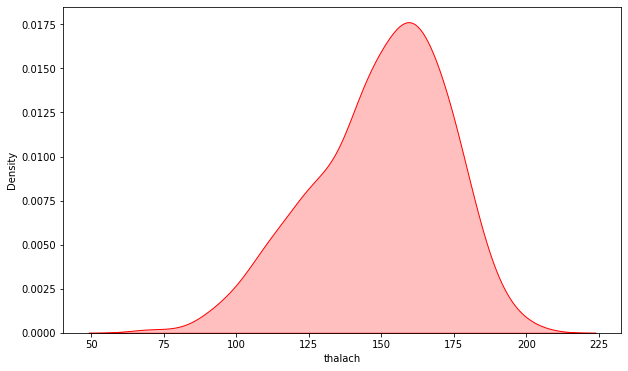

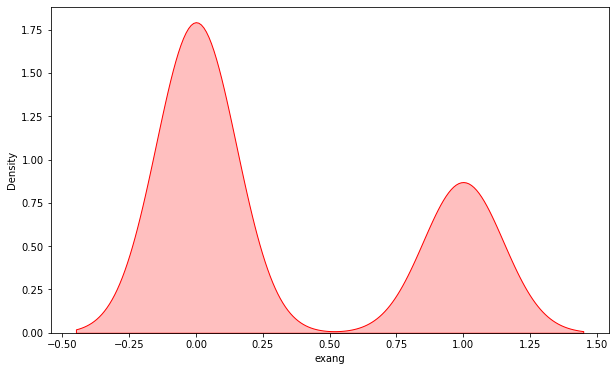

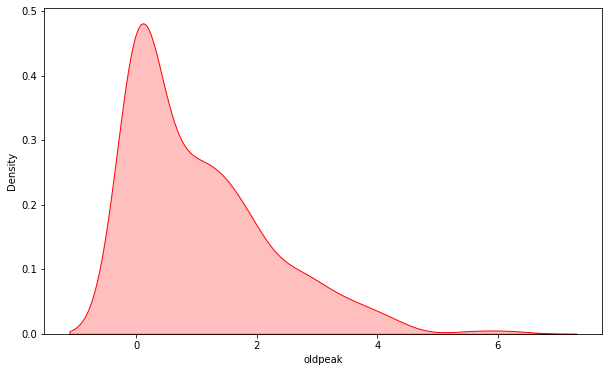

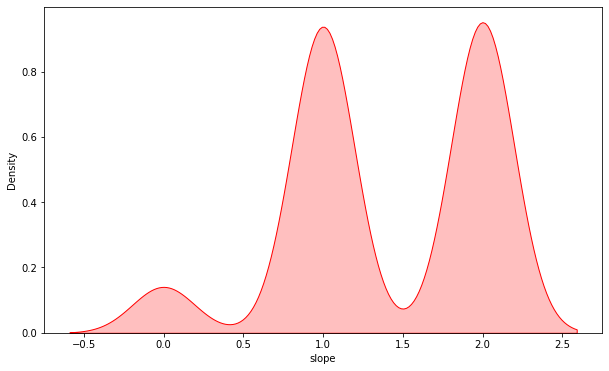

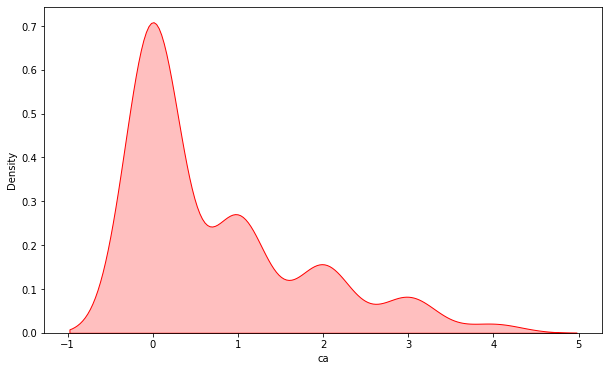

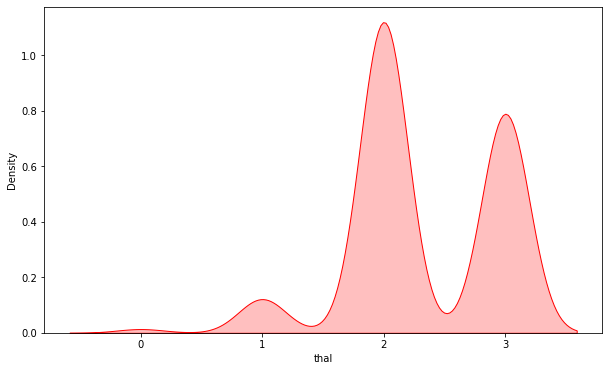

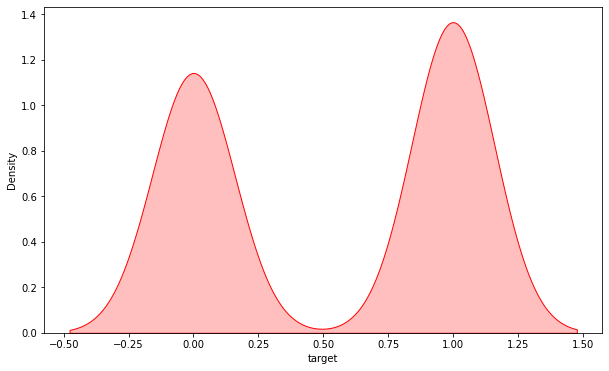

In [11]:
# Kernel Density Estimator plot

for i in df.columns:
    f, ax = plt.subplots(figsize=(10,6))
    x = df[i]
    x = pd.Series(x, name= i)
    ax = sns.kdeplot(x, shade=True, color='r')
    plt.show();

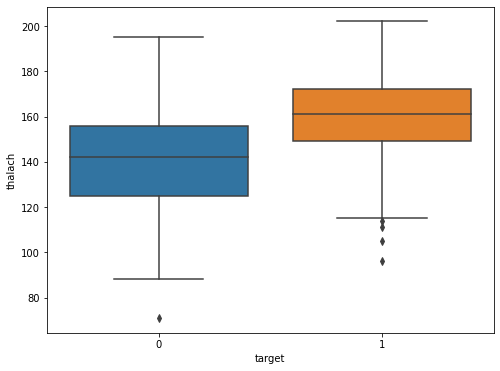

In [12]:
# Boxplot for target and thalach

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

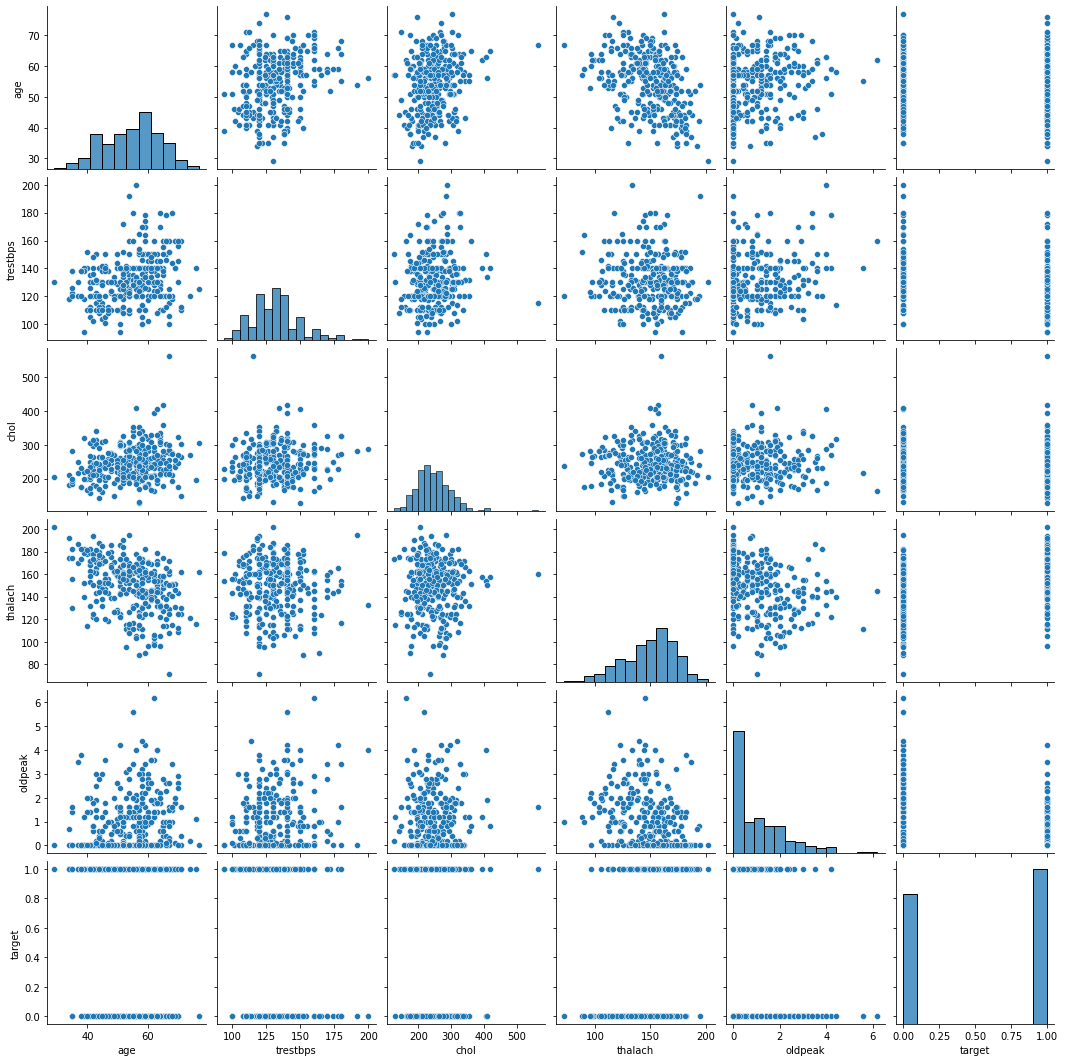

In [13]:
# Scatter plots 

num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show();

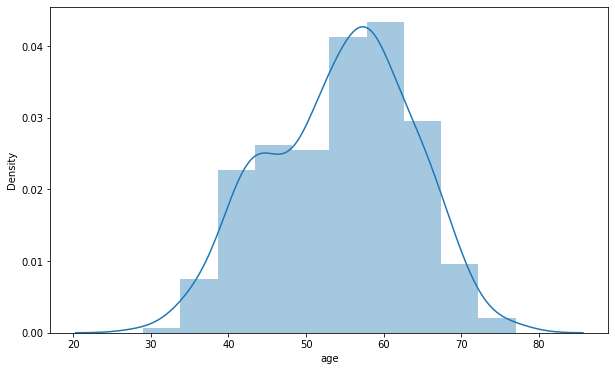

In [14]:
# Lets see the distribution of the target

f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show();

### Feature Engineering

In [15]:
# Dividing the categorical and continuous features

categorical_val = []
continuous_val = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

In [17]:
# Lets check categorical and continuous columns

print("Categorical features are:", categorical_val)
print("Continuous features are:", continuous_val)

Categorical features are: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous features are: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [18]:
# Lets remove the target from categorical_val as we dont want to perform One Hot Encoding on the target

categorical_val.remove("target")

In [19]:
# Handling categorical features
## One Hot Encoding

dataset = pd.get_dummies(df, columns = categorical_val)

In [24]:
# Feture Scaling
# Here we will perform feature scaling on the selected numerical features that we will use in our model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['trestbps', 'chol', 'thalach']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [26]:
# Lets check our dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,37,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,41,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,56,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,57,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


In [27]:
# Fetaure selection

cols = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang'] 

### Model Building
#### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Independent and Dependent features

X = df[cols]
y = dataset.target

In [33]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Lets see the train set and test set shape

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(212, 7), y:(212,)
Shape test set: X:(91, 7), y:(91,)


In [36]:
# Model fitting with k =1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [40]:
# Predictions and Evaluations

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(accuracy_score(pred, y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6043956043956044
[[24 17]
 [19 31]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.57        41
           1       0.65      0.62      0.63        50

    accuracy                           0.60        91
   macro avg       0.60      0.60      0.60        91
weighted avg       0.61      0.60      0.61        91



### Hyperparameter Optimization
Let's go ahead and pick a good K Value:

In [43]:
# Choosing the right K value based on error rate

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

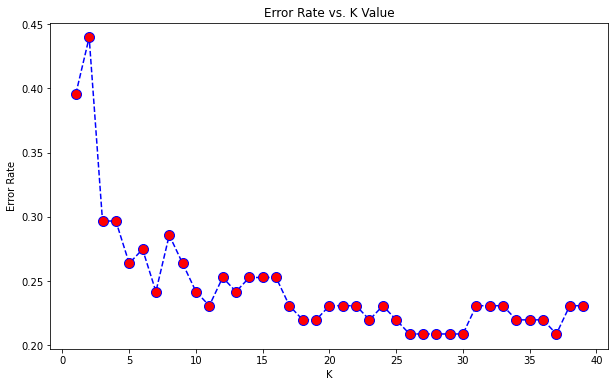

In [44]:
# Lets plot for better visualization

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that after arouns K>12 the error rate just tends to hover around 0.20-0.25 Let's retrain the model with that and check the classification report!

In [52]:
# Simalarly we can use accuracy_rate for choosing the right K value 

accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_rate.append(pred_i.mean())

Text(0, 0.5, 'Accuracy Rate')

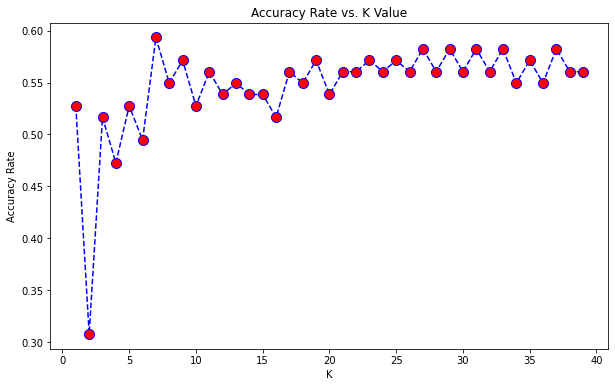

In [53]:
# Lets plot

plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [51]:
# Model Fitting with k=12

model = KNeighborsClassifier(n_neighbors = 12)

model.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7692307692307693
[[30 11]
 [10 40]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        41
           1       0.78      0.80      0.79        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



### Saving the model for future use

In [56]:
import joblib
joblib.dump(model,r"C:\Users\SWARNAVA\Desktop\Heart\heart_model.pkl")

['C:\\Users\\SWARNAVA\\Desktop\\Heart\\heart_model.pkl']